# Classification model using Decision Tree

### 1. Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload Clinic data

In [5]:
path ='../../../Data_preprocessing/Prediction OS/Clinical_data_categorized_OS.csv' 
data = pd.read_csv(path)
data.head()

,Unnamed: 0,Unnamed: 0.1,Cohort,Arm,Sex,Age,MSKCC,IMDC,Sarc,Rhab,Sarc_or_Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,OS,TM_TC_Ratio,ImmunoPhenotype
0,0,0,0,1,1,73,1,-1,0.0,0.0,0.0,2.0,808,3.636364,7.594521,1.368624,1
1,1,1,0,1,1,55,1,-1,0.0,0.0,0.0,2.0,1826,-13.709677,9.369863,1.524401,0
2,2,2,0,1,1,51,2,-1,0.0,0.0,0.0,1.0,1541,26.666667,23.441096,1.046688,1
3,3,3,0,1,1,70,0,-1,0.0,0.0,0.0,3.0,-1,5.714286,10.487671,-1.000000,-1
4,4,4,0,1,1,59,0,-1,0.0,0.0,0.0,3.0,376,-4.545455,49.052055,0.917459,1


In [6]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.OS[i]<20: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

data = data.drop('OS', axis=1) # As we won't need this column any more, I deleted it.

X = data.iloc[:,2:16] 
# I selected all the columns by removing the Unnamed column (row id) and the Target column.
print(X)
print('Number of patients: ',len(Y))

     Cohort  Arm  Sex  Age  MSKCC  IMDC  Sarc  Rhab  Sarc_or_Rhab  \
0         0    1    1   73      1    -1   0.0   0.0           0.0   
1         0    1    1   55      1    -1   0.0   0.0           0.0   
2         0    1    1   51      2    -1   0.0   0.0           0.0   
3         0    1    1   70      0    -1   0.0   0.0           0.0   
4         0    1    1   59      0    -1   0.0   0.0           0.0   
..      ...  ...  ...  ...    ...   ...   ...   ...           ...   
453       1    0    0   62      0     0   0.0   0.0           0.0   
454       1    1    1   65      1     1   0.0   0.0           0.0   
455       1    0    1   68      1     1   0.0   0.0           0.0   
456       1    1    0   48      0     1   0.0   0.0           0.0   
457       1    1    0   76      1     1   0.0   0.0           0.0   

     Number_of_Prior_Therapies  \
0                          2.0   
1                          2.0   
2                          1.0   
3                          3.0   
4

### 3. Train-Test dataset split

In [7]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 366
Target column size of the training set: 366
Test set size: 92
Target column size of the test set: 92


### 4. Select the parameters of the model and fit it

In [8]:
param_grid = {'min_samples_leaf': [2,5,7,10],
              'min_samples_split': [2, 5, 7, 10],
              'max_depth':[2,5,10,12,15,20,100],
              'criterion':['entropy','gini'],
              'splitter': ['best', 'random'],
              'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 12, 15, 20, 100],
                         'min_samples_leaf': [2, 5, 7, 10],
                         'min_samples_split': [2, 5, 7, 10],
                         'random_state': [125],
                         'splitter': ['best', 'random']})

In [9]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       random_state=125)

In [10]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.6993335801554978


### 5. Prediction

In [11]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [12]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [13]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.7814207650273224
Final accuracy on the testing dataset: 0.7717391304347826


In [14]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[135  28]
 [ 52 151]]
Input data:  [1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0
 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0
 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1]
Prediction:        [1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 

In [15]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       163
           1       0.84      0.74      0.79       203

    accuracy                           0.78       366
   macro avg       0.78      0.79      0.78       366
weighted avg       0.79      0.78      0.78       366



In [16]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[30 12]
 [ 9 41]]
Input data:  [0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1
 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0]
Prediction:        [0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0
 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1]


In [17]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        42
           1       0.77      0.82      0.80        50

    accuracy                           0.77        92
   macro avg       0.77      0.77      0.77        92
weighted avg       0.77      0.77      0.77        92



### 7. Results visualizaton

In [18]:
from sklearn.tree import export_text

texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = ['Cohort','Arm','Sex','Age','MSKCC','IMDC','Sarc_or_Rhab','Number_of_Prior_Therapies','Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy','Tumor_Shrinkage','Benefit','OS','TM_TC_Ratio','ImmunoPhenotype']
               )
print(texto_modelo)

|--- OS <= -3.87
|   |--- OS <= -42.16
|   |   |--- Benefit <= 940.50
|   |   |   |--- MSKCC <= 1.50
|   |   |   |   |--- Age <= 61.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  61.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- MSKCC >  1.50
|   |   |   |   |--- class: 1
|   |   |--- Benefit >  940.50
|   |   |   |--- class: 1
|   |--- OS >  -42.16
|   |   |--- MSKCC <= 1.50
|   |   |   |--- Benefit <= 681.50
|   |   |   |   |--- OS <= -22.90
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- OS >  -22.90
|   |   |   |   |   |--- class: 0
|   |   |   |--- Benefit >  681.50
|   |   |   |   |--- Benefit <= 1771.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Benefit >  1771.00
|   |   |   |   |   |--- class: 0
|   |   |--- MSKCC >  1.50
|   |   |   |--- Benefit <= 1703.50
|   |   |   |   |--- class: 1
|   |   |   |--- Benefit >  1703.50
|   |   |   |   |--- class: 1
|--- OS >  -3.87
|   |--- MSKCC <= 1.50
|   |   |--- Benefit <= 2801.50
|   |   |  

Tree depth: 5
Number of terminal nodes: 20


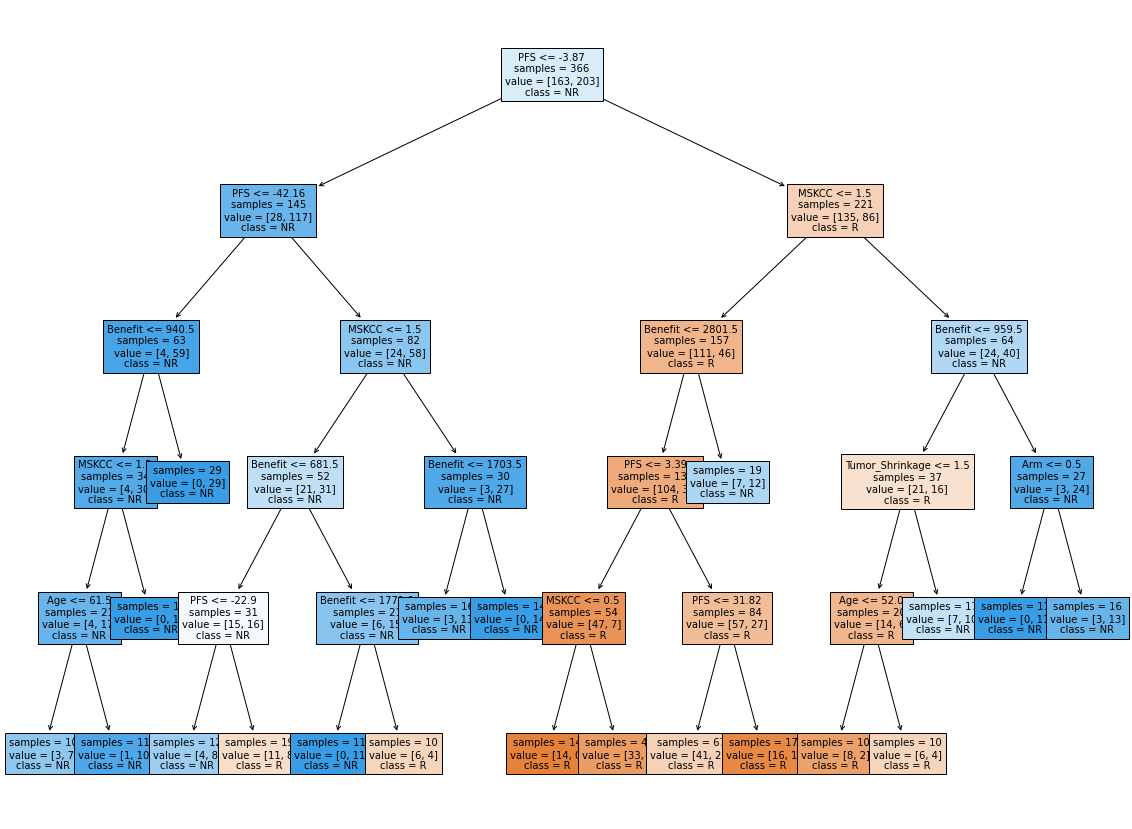

In [19]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree depth: {model.get_depth()}")
print(f"Number of terminal nodes: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = ['Cohort','Arm','Sex','Age','MSKCC','IMDC','Sarc_or_Rhab','Number_of_Prior_Therapies','Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy','Tumor_Shrinkage','Benefit','PFS','OS','TM_TC_Ratio','ImmunoPhenotype'],
            class_names   = ['R','NR'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )